# BLACKJACK

In [2]:
import numpy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data = pd.read_csv('blkjckhands.csv')
data.head()

,Unnamed: 0,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
0,0,Player1,7,10,0,0,0,17,10,8,0,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
1,1,Player2,10,9,0,0,0,19,10,8,0,0,0,18,nowin,Win,Plwin,Beat,20,0,19
2,2,Player3,9,8,0,0,0,17,10,8,0,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
3,3,Player4,2,10,0,5,0,17,10,8,0,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
4,4,Player5,10,2,0,5,0,17,10,8,0,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12


## Start wih cleaning a data, change values for numerics

In [5]:
data = data.drop(columns=['dlwinamt', 'plwinamt', 'PlayerNo'])
data = data.drop_duplicates()
data = data.dropna()  # Drops all rows with any NaN values
data.tail()


,Unnamed: 0,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,ply2cardsum
899994,0,10,10,0,0,0,20,3,9,4,2,0,18,nowin,Win,Plwin,Beat,20
899995,1,10,7,0,0,0,17,3,9,4,2,0,18,nowin,Loss,Beat,Dlwin,17
899996,2,6,1,10,0,0,17,3,9,4,2,0,18,nowin,Loss,Beat,Dlwin,7
899997,3,4,2,9,0,0,15,3,9,4,2,0,18,nowin,Loss,Beat,Dlwin,6
899998,4,9,10,0,0,0,19,3,9,4,2,0,18,nowin,Win,Plwin,Beat,19


In [6]:
data['winloss'] = data['winloss'].map({'Win': 1.0, 'Loss': 0.0, 'Push': 0.5}).astype(float)
data['blkjck'] = data['blkjck'].map({'Win': 1, 'nowin': 0}).astype(int)
data = pd.get_dummies(data, columns=['dlbustbeat', 'plybustbeat'], prefix=['dl', 'ply'])
data.head()

,Unnamed: 0,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,dealcard4,dealcard5,sumofdeal,blkjck,winloss,ply2cardsum,dl_Beat,dl_Bust,dl_Dlwin,dl_PlBust,dl_Push,ply_Beat,ply_Bust,ply_DlBust,ply_Plwin,ply_Push
0,0,7,10,0,0,0,17,10,8,0,0,0,18,0,0.0,17,False,False,True,False,False,True,False,False,False,False
1,1,10,9,0,0,0,19,10,8,0,0,0,18,0,1.0,19,True,False,False,False,False,False,False,False,True,False
2,2,9,8,0,0,0,17,10,8,0,0,0,18,0,0.0,17,False,False,True,False,False,True,False,False,False,False
3,3,2,10,0,5,0,17,10,8,0,0,0,18,0,0.0,12,False,False,True,False,False,True,False,False,False,False
4,4,10,2,0,5,0,17,10,8,0,0,0,18,0,0.0,12,False,False,True,False,False,True,False,False,False,False


## Ideal Strategy

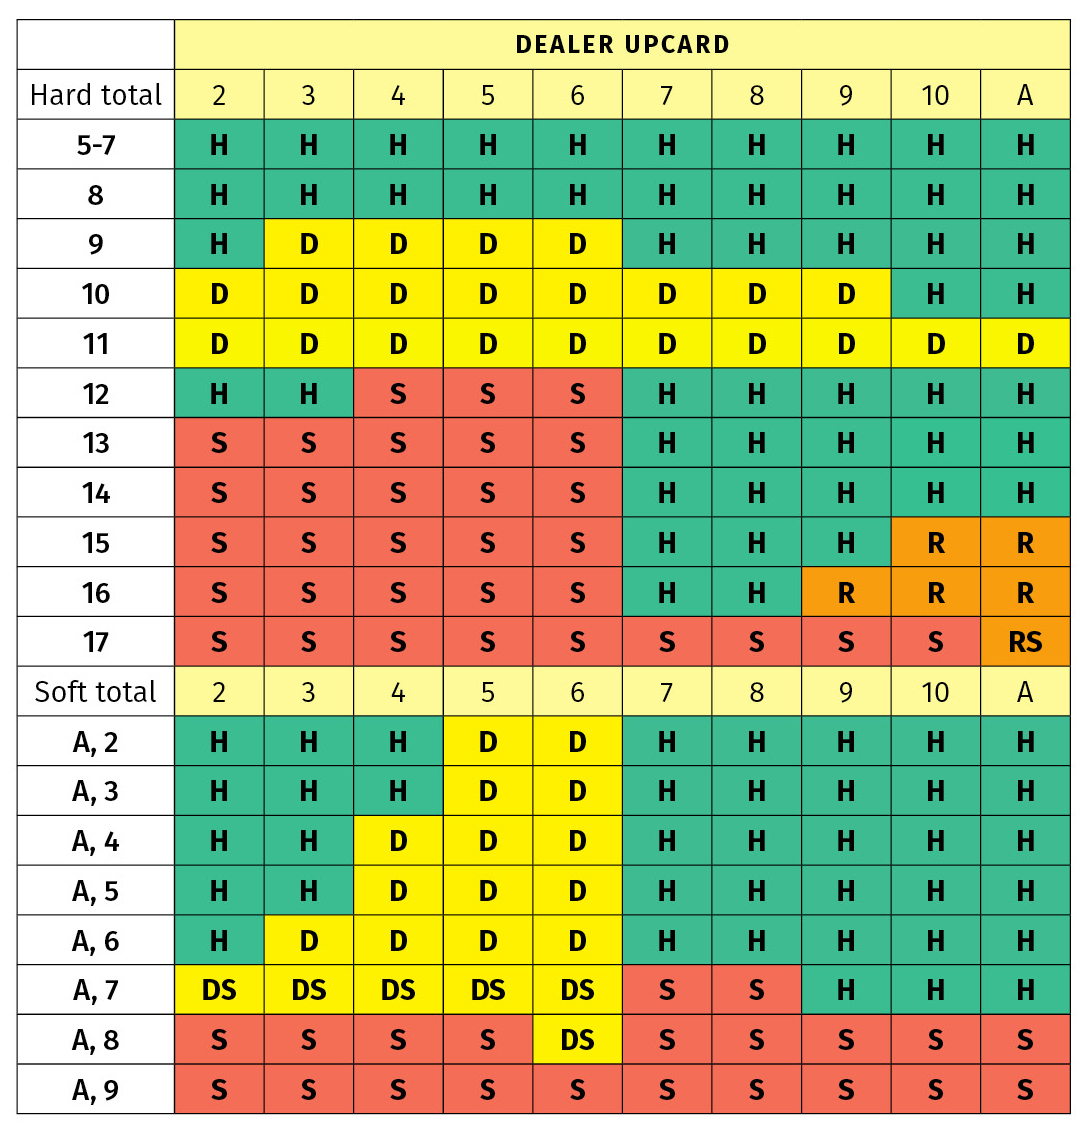

In [8]:
from IPython.display import Image, display
display(Image(filename='Ideal_Strategy.jpg', width=700))

## Adding new column 'take_card', which based on ideal strategy stores the decision: to take a new card (1) or not to take (0) after the first 2 cards are dealt.

In [10]:
def decide_take_card(ply2cardsum, dealer_card):
    if ply2cardsum >= 17:
        return 0  # Always Stand
    elif 13 <= ply2cardsum <= 16:
        return 0 if 2 <= dealer_card <= 6 else 1  # Stand for dealer 2-6, else Hit
    elif ply2cardsum == 12:
        return 0 if 4 <= dealer_card <= 6 else 1  # Stand for dealer 4-6, else Hit
    elif ply2cardsum == 11:
        return 1  # Always Double Down
    elif ply2cardsum == 10:
        return 1  # Double Down for dealer < 10, else Hit
    elif ply2cardsum == 9:
        return 1  # Double Down for dealer 3-6, else Hit
    else:
        return 1  # Always Hit for totals of 8 or less



# Add the "take_card" column
data['take_card'] = data.apply(lambda row: decide_take_card(row['ply2cardsum'], row['dealcard1']), axis=1)

data.head(100)

,Unnamed: 0,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,dealcard4,dealcard5,sumofdeal,blkjck,winloss,ply2cardsum,dl_Beat,dl_Bust,dl_Dlwin,dl_PlBust,dl_Push,ply_Beat,ply_Bust,ply_DlBust,ply_Plwin,ply_Push,take_card
0,0,7,10,0,0,0,17,10,8,0,0,0,18,0,0.0,17,False,False,True,False,False,True,False,False,False,False,0
1,1,10,9,0,0,0,19,10,8,0,0,0,18,0,1.0,19,True,False,False,False,False,False,False,False,True,False,0
2,2,9,8,0,0,0,17,10,8,0,0,0,18,0,0.0,17,False,False,True,False,False,True,False,False,False,False,0
3,3,2,10,0,5,0,17,10,8,0,0,0,18,0,0.0,12,False,False,True,False,False,True,False,False,False,False,1
4,4,10,2,0,5,0,17,10,8,0,0,0,18,0,0.0,12,False,False,True,False,False,True,False,False,False,False,1
5,5,6,1,8,10,0,25,10,8,0,0,0,18,0,0.0,7,False,False,False,True,False,False,True,False,False,False,1
6,0,10,4,0,0,0,14,4,4,5,10,0,23,0,1.0,14,False,True,False,False,False,False,False,True,False,False,0
7,1,3,10,0,0,0,13,4,4,5,10,0,23,0,1.0,13,False,True,False,False,False,False,False,True,False,False,0
8,2,10,2,0,0,0,12,4,4,5,10,0,23,0,1.0,12,False,True,False,False,False,False,False,True,False,False,0
9,3,9,6,0,0,0,15,4,4,5,10,0,23,0,1.0,15,False,True,False,False,False,False,False,True,False,False,0


## Seperating the data

In [12]:
# Define features (X) and target (y)
sample_data = data.sample(frac=0.1, random_state=42)  # 10% данных
print(sample_data)
features = sample_data.drop(columns=['take_card'])
# Targets: Individual target columns
target_take_card = sample_data['take_card']

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



## Training the model

In [14]:
# Split data for 'take_card'
X_train_tc, X_test_tc, y_train_tc, y_test_tc = train_test_split(
    features, target_take_card, test_size=0.2, random_state=2
)

In [15]:
print(y_train_tc.isnull().sum())  # Check for NaNs in the 'take_card' target

0


In [16]:
# Train Random Forest for 'take_card'
clf_take_card = RandomForestClassifier(random_state=2, class_weight='balanced')
clf_take_card.fit(X_train_tc, y_train_tc)

RandomForestClassifier(class_weight='balanced', random_state=2)

## For some reason model accuracy is 1.00, which cannot be right, because when player 2 card sum is 12, the model doesn't act as predicted. Look at next couple of cells for better understanding.

take_card model accuracy: 1.00
take_card      1.000000
card4          0.518100
card3          0.481426
dealcard1      0.413152
sumofcards     0.381855
ply_Bust       0.352635
dl_PlBust      0.352635
card5          0.209652
dealcard2      0.104994
dl_Beat        0.009519
ply_Plwin      0.009519
ply_Push       0.008893
dl_Push        0.008893
Unnamed: 0     0.000477
sumofdeal     -0.043349
dealcard3     -0.123000
winloss       -0.136974
dealcard5     -0.137030
dl_Bust       -0.157449
ply_DlBust    -0.157449
dl_Dlwin      -0.164870
ply_Beat      -0.164870
blkjck        -0.227773
dealcard4     -0.275067
card1         -0.480434
card2         -0.483116
ply2cardsum   -0.678052
Name: take_card, dtype: float64


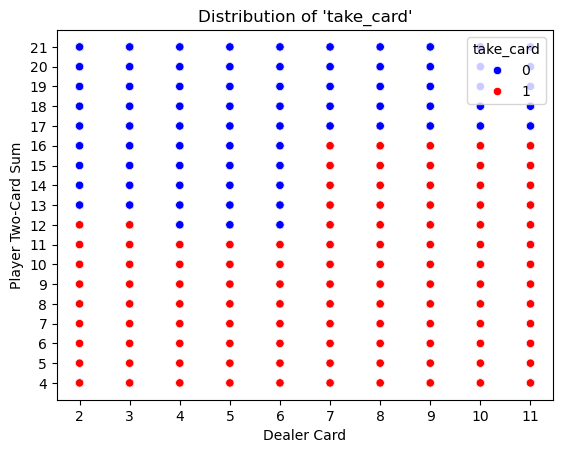

In [18]:
# Evaluate 'take_card' model
accuracy_take_card = clf_take_card.score(X_test_tc, y_test_tc)
print(f"take_card model accuracy: {accuracy_take_card:.2f}")

# Display correlations
correlations = data.corr()
print(correlations['take_card'].sort_values(ascending=False))

# Filter the data to exclude invalid rows
filtered_data = data[(data['dealcard1'] >= 2) & (data['ply2cardsum'] >= 4)]

# Create scatterplot with swapped axes and custom colors
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    x='dealcard1',  # X-axis for dealer's card
    y='ply2cardsum',  # Y-axis for player's two-card sum
    hue='take_card',
    palette={0: 'blue', 1: 'red'},  # Define colors for take_card categories
    data=filtered_data
)

plt.title("Distribution of 'take_card'")
plt.xlabel("Dealer Card")  # Set appropriate x-axis label
plt.ylabel("Player Two-Card Sum")  # Set appropriate y-axis label

# Set axis tick intervals to 1
plt.xticks(range(2, int(filtered_data['dealcard1'].max()) + 1, 1))
plt.yticks(range(4, int(filtered_data['ply2cardsum'].max()) + 1, 1))

plt.show()


In [19]:
def predict_action(ply2cardsum, card1, card2, dealer_card, clf, feature_names):
    """
    Predict the action (take card, double, or split) based on player's hand sum and dealer's visible card.

    Args:
    - ply2cardsum (int): Sum of the player's first two cards.
    - dealer_card (int): The dealer's visible card.
    - clf (RandomForestClassifier): The trained Random Forest model.
    - feature_names (list): List of feature names used during training.

    Returns:
    - int: Predicted action (0 or 1).
    """
    # Create a DataFrame for input with default values for all features
    input_data = pd.DataFrame(columns=feature_names)
    input_data.loc[0] = 0  # Initialize all features to 0

    # Set the relevant features
    input_data['ply2cardsum'] = ply2cardsum
    input_data['dealcard1'] = dealer_card
    input_data['card1'] = card1
    input_data['card2'] = card2

    # Ensure all features are present in the correct order
    input_data = input_data[feature_names]

    # Predict the action (take card, double, or split)
    prediction = clf.predict(input_data)[0]
    return prediction

In [20]:
def generate_card_pairs(target_sum):
    """
    Generate all valid pairs of two cards that sum up to a given target.

    Args:
    - target_sum (int): The desired sum of two cards.

    Returns:
    - List of tuples, where each tuple is a pair of cards (card1, card2).
    """
    card_pairs = []
    for card1 in range(1, 12):  # Cards range from 1 (Ace as 1) to 11 (Ace as 11 or a face card)
        card2 = target_sum - card1
        if 1 <= card2 <= 11:  # Ensure card2 is also a valid card
            card_pairs.append((card1, card2))
    return card_pairs


def loop_through_possibilities_and_compare(
    clf_take_card, feature_names_take_card,):
    """
    Loops through all possible combinations of player's two-card sum and dealer's visible card
    and outputs the model's decision to take a card, double, or split.

    Args:
    - clf_take_card (RandomForestClassifier): The trained Random Forest model for "take card."
    - clf_double (RandomForestClassifier): The trained Random Forest model for "double."
    - clf_split (RandomForestClassifier): The trained Random Forest model for "split."
    - feature_names_take_card (list): List of feature names used for "take card."
    - feature_names_double (list): List of feature names used for "double."
    - feature_names_split (list): List of feature names used for "split."

    Output:
    - Prints the result for each combination in a readable format.
    """
    # Print the header
    print(f"{'Player Sum':<12}{'Dealer Card':<12}{'Card Pair':<20}{'Take Card':<20}")

    for ply2cardsum in range(4, 22):  # Loop through player's sums from 4 to 21
        for dealer_card in range(2, 12):  # Dealer's upcard (2 to 11, Ace as 11)
            card_pairs = generate_card_pairs(ply2cardsum)
            for card1, card2 in card_pairs:
                # Predict actions
                action_take_card = predict_action(ply2cardsum, card1, card2, dealer_card, clf_take_card, feature_names_take_card)

                # Convert predictions to readable actions
                suggestion_take_card = "Take a card" if action_take_card == 1 else "Do NOT take a card"

                # Print the result in a formatted way
                print(f"{ply2cardsum:<12}{dealer_card:<12}{str((card1, card2)):<20}{suggestion_take_card:<20}")

# Ensure feature_names corresponds to the model you're using
# For example, if using clf_take_card, use X_train_tc, for clf_double use X_train_dbl, etc.
feature_names_take_card = X_train_tc.columns  # For clf_take_card

# Now run the function for all three models
loop_through_possibilities_and_compare(clf_take_card, feature_names_take_card)


Player Sum  Dealer Card Card Pair           Take Card           
4           2           (1, 3)              Take a card         
4           2           (2, 2)              Take a card         
4           2           (3, 1)              Take a card         
4           3           (1, 3)              Take a card         
4           3           (2, 2)              Take a card         
4           3           (3, 1)              Take a card         
4           4           (1, 3)              Take a card         
4           4           (2, 2)              Take a card         
4           4           (3, 1)              Take a card         
4           5           (1, 3)              Take a card         
4           5           (2, 2)              Take a card         
4           5           (3, 1)              Take a card         
4           6           (1, 3)              Take a card         
4           6           (2, 2)              Take a card         
4           6           (

## When player 2 card sum is 12, the model doesn't act as predicted.

In [22]:
# Print header
print(f"{'Player Sum':<12}{'Dealer Card':<12}{'Logic Take Card':<20}{'Model Take Card':<20}")

# Loop through player sums from 4 to 21
for player_sum in range(4, 22):
    for dealer_card in range(2, 12):
        # Generate possible player cards that sum to the player_sum
        # Here, we assume a scenario where two cards could make up the player_sum
        plycard1 = plycard2 = player_sum // 2  # This assumes the cards are roughly equal

        # Expected action based on the provided decide_take_card logic
        logic_take_card = decide_take_card(player_sum, dealer_card)
        logic_take_card_suggestion = "Take a card" if logic_take_card == 1 else "Do NOT take a card"

        # Model's prediction for "Take Card"
        model_take_card = predict_action(player_sum, plycard1, plycard2, dealer_card, clf_take_card, feature_names_take_card)
        model_take_card_suggestion = "Take a card" if model_take_card == 1 else "Do NOT take a card"

        print(f"{player_sum:<12}{dealer_card:<12}{logic_take_card_suggestion:<20}{model_take_card_suggestion:<20}")


Player Sum  Dealer Card Logic Take Card     Model Take Card     
4           2           Take a card         Take a card         
4           3           Take a card         Take a card         
4           4           Take a card         Take a card         
4           5           Take a card         Take a card         
4           6           Take a card         Take a card         
4           7           Take a card         Take a card         
4           8           Take a card         Take a card         
4           9           Take a card         Take a card         
4           10          Take a card         Take a card         
4           11          Take a card         Take a card         
5           2           Take a card         Take a card         
5           3           Take a card         Take a card         
5           4           Take a card         Take a card         
5           5           Take a card         Take a card         
5           6           T

## Display feature importances on graph

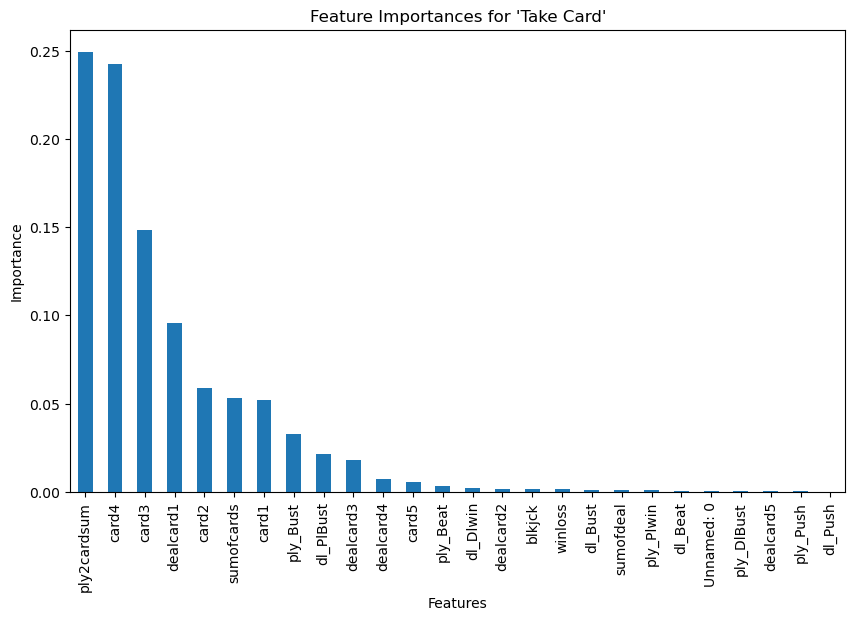

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_train_tc, X_train_dbl, and X_train_spl are your training datasets for each model
# and clf_take_card, clf_double, clf_split are your trained models

# Function to plot feature importances for a given model
def plot_feature_importances(clf, X_train, title):
    feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
    feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), title=title)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()

# Plot feature importances for each model
plot_feature_importances(clf_take_card, X_train_tc, "Feature Importances for 'Take Card'")


## As we can see, the model might be overfitting to features like card4, card3, etc., which might not have a direct logical role in determining whether to take a card or not.

## SOLUTION 1. Train with only relevant features.

In [27]:
# Restrict data to relevant features for 'take_card'
X_tc = data[['card1', 'card2', 'ply2cardsum', 'dealcard1']]
y_tc = data['take_card']

# Split into training and testing sets for 'take_card'
X_train_tc, X_test_tc, y_train_tc, y_test_tc = train_test_split(X_tc, y_tc, test_size=0.2, random_state=42)

# Train the Random Forest model for 'take_card'
clf_take_card = RandomForestClassifier(random_state=42)
clf_take_card.fit(X_train_tc, y_train_tc)

# Evaluate the model accuracy for 'take_card'
accuracy_tc = clf_take_card.score(X_test_tc, y_test_tc)
print(f"Model accuracy for 'take_card' after feature restriction: {accuracy_tc:.2f}")


Model accuracy for 'take_card' after feature restriction: 1.00


In [28]:
# Print header
print(f"{'Player Sum':<12}{'Dealer Card':<12}{'Logic Take Card':<20}{'Model Take Card':<20}")

# Loop through possible scenarios
for player_sum in range(4, 22):  # Loop through player sums from 8 to 17
    for dealer_card in range(2, 12):  # Loop through dealer cards from 2 to 11
        # Card 1 and Card 2 values for splitting (simulate pairs)
        card1 = card2 = player_sum // 2 if player_sum % 2 == 0 else 0  # Ensure pairs for splits

        # Logic-based expected actions
        logic_take_card = decide_take_card(player_sum, dealer_card)

        # Model's predicted actions
        model_take_card_action = predict_action(player_sum, card1, card2, dealer_card, clf_take_card, X_train_tc.columns)
        # Convert actions to readable suggestions
        logic_take_card_suggestion = "Take a card" if logic_take_card == 1 else "Do NOT take a card"
        model_take_card_suggestion = "Take a card" if model_take_card_action == 1 else "Do NOT take a card"


        # Print the comparison
        print(f"{player_sum:<12}{dealer_card:<12}{logic_take_card_suggestion:<20}{model_take_card_suggestion:<20}"
)


Player Sum  Dealer Card Logic Take Card     Model Take Card     
4           2           Take a card         Take a card         
4           3           Take a card         Take a card         
4           4           Take a card         Take a card         
4           5           Take a card         Take a card         
4           6           Take a card         Take a card         
4           7           Take a card         Take a card         
4           8           Take a card         Take a card         
4           9           Take a card         Take a card         
4           10          Take a card         Take a card         
4           11          Take a card         Take a card         
5           2           Take a card         Take a card         
5           3           Take a card         Take a card         
5           4           Take a card         Take a card         
5           5           Take a card         Take a card         
5           6           T

## As we can see the model now predicts the decisions as expected.

## TESTING THE MODEL

# Blackjack Simulation Rules

## Player Rules
- **Initial Cards**:
  - The player is dealt 2 cards.
  - The player sees their 2 cards and 1 dealer card (the "upcard").
- **Player Actions**:
  - The player chooses to **Hit** (take another card) or **Stand** (keep current cards).
- **Busts**:
  - If the player's total exceeds 21, they lose automatically.
- **Soft Hands**:
  - An Ace counts as **11** unless it causes the total to exceed 21; then it counts as **1**.

## Dealer Rules
- **Initial Cards**:
  - The dealer is dealt 2 cards: one face up (visible to the player) and one face down.
- **Action Rules**:
  - The dealer **must draw a card** if their total is **16 or less**.
  - The dealer **must stand** if their total is **17 or more**.
  - For a **soft 17** (a hand totaling 17 with an ace valued at 11), the dealer **must stand**.
- **Busts**:
  - If the dealer's total exceeds 21, the dealer loses automatically.

## Game Outcomes
- **Player Wins**:
  - The player's hand total is closer to 21 than the dealer's, or the dealer busts.
- **Dealer Wins**:
  - The dealer's hand total is closer to 21 than the player's, or the player busts.
- **Tie**:
  - If the player's and dealer's hand totals are equal, the game ends in a "push."

## Shoe and Dealing Rules
- **Shoe Composition**:
  - The shoe contains **4 decks** shuffled together.
  - Each deck has **52 cards**, including all suits and ranks from Ace to King.
- **Reshuffling**:
  - The shoe is reshuffled when **75–85%** of the cards have been used.
- **Card Removal**:
  - Cards are dealt from the top of the shoe and are not returned until a reshuffle.

## Objective
- Train the model to make decisions that mimic real blackjack strategies under casino conditions.


In [32]:
import random
def create_shoe(num_decks=4):
    """Creates a shoe with multiple decks shuffled together."""
    single_deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11]
    shoe = single_deck * 4 * num_decks
    random.shuffle(shoe)
    return shoe

def reshuffle_needed(cards_used, shoe_size, reshuffle_threshold=(0.75, 0.85)):
    """Checks if the shoe needs to be reshuffled based on the threshold."""
    used_percentage = cards_used / shoe_size
    return reshuffle_threshold[0] <= used_percentage <= reshuffle_threshold[1]

def player_card(shoe):
    """Deals the initial cards for the player."""
    return [shoe.pop(0), shoe.pop(0)]

def dealer_get_card(shoe):
    """Deals the initial cards for the dealer."""
    return [shoe.pop(0), shoe.pop(0)]

def model_desicion(player_card, dealer_get_card, deck, last_taken_card):
    player_sum = sum(player_card) 
    model_action = predict_action(player_sum, card1, card2, dealer_get_card, clf_take_card, X_train_tc.columns)
    return model_action

def dealer_takes_card(dealer_hand, deck, last_taken_card):
    next_card = deck[last_taken_card + 1]
    dealer_hand.append(next_card)
    return dealer_hand

In [33]:
def simulate_100_games():
# Results tracking
    results = []
    games = 1

    # Initial balance and bet setup
    initial_balance = 1000  # Starting balance
    balance = initial_balance
    bet_amount = 10  # Fixed bet amount per game
    
    # Create the initial shoe
    shoe = create_shoe()
    original_shoe_size = len(shoe)
    cards_used = 0  # Track cards used
    
    while games > 0:
        # Reshuffle if there are not enough cards left
        if reshuffle_needed(cards_used, original_shoe_size):
            shoe = create_shoe()
            original_shoe_size = len(shoe)
            cards_used = 0
    
        # Deal cards to the player and dealer
        player = player_card(shoe)
        dealer = dealer_get_card(shoe)
        cards_used += 4  # 2 for the player, 2 for the dealer
    
        # Player's turn
        while True:
            decision = predict_action(sum(player), player[0], player[1], dealer[0], clf_take_card, X_train_tc.columns)
            if decision == 1:  # Player decides to take a card
                player.append(shoe.pop(0))
                cards_used += 1
                if sum(player) > 21:  # Check for bust and handle a soft hand
                    if 11 in player:
                        player[player.index(11)] = 1
                    else:
                        break
            else:
                break
    
        # Dealer's turn
        while sum(dealer) <= 16:
            dealer.append(shoe.pop(0))
            cards_used += 1
            if sum(dealer) > 21:  # Check for bust and handle a soft hand
                if 11 in dealer:
                    dealer[dealer.index(11)] = 1
                else:
                    break
    
        # Determine the game outcome and update the balance
        if sum(player) > 21:  # Player busts
            results.append(0)
            balance -= bet_amount  # Loss
        elif sum(dealer) > 21:  # Dealer busts
            results.append(1)
            balance += bet_amount  # Win
        elif sum(player) > sum(dealer):  # Player wins
            results.append(1)
            balance += bet_amount  # Win
        elif sum(player) == sum(dealer):  # Tie
            results.append(0.5)
            # No change to the balance
        else:  # Dealer wins
            results.append(0)
            balance -= bet_amount  # Loss
    
        games -= 1
    
    # Summary statistics
    wins = results.count(1)
    ties = results.count(0.5)
    losses = results.count(0)
    print("wins:", wins)
    print("ties:", ties)
    print("losses:", losses)
    print("total games:", len(results))
    print("initial balance:", initial_balance)
    print("final balance:", balance)
    print("profit/loss:", balance - initial_balance)
    ls =  [wins, ties, losses,  balance - initial_balance]
    return ls

In [34]:
result = []
for _ in range(1000):
    game = simulate_100_games()
    result.append(game)
print(result)

wins: 1
ties: 0
losses: 0
total games: 1
initial balance: 1000
final balance: 1010
profit/loss: 10
wins: 0
ties: 0
losses: 1
total games: 1
initial balance: 1000
final balance: 990
profit/loss: -10
wins: 0
ties: 0
losses: 1
total games: 1
initial balance: 1000
final balance: 990
profit/loss: -10
wins: 1
ties: 0
losses: 0
total games: 1
initial balance: 1000
final balance: 1010
profit/loss: 10
wins: 0
ties: 0
losses: 1
total games: 1
initial balance: 1000
final balance: 990
profit/loss: -10
wins: 0
ties: 0
losses: 1
total games: 1
initial balance: 1000
final balance: 990
profit/loss: -10
wins: 1
ties: 0
losses: 0
total games: 1
initial balance: 1000
final balance: 1010
profit/loss: 10
wins: 0
ties: 0
losses: 1
total games: 1
initial balance: 1000
final balance: 990
profit/loss: -10
wins: 1
ties: 0
losses: 0
total games: 1
initial balance: 1000
final balance: 1010
profit/loss: 10
wins: 1
ties: 0
losses: 0
total games: 1
initial balance: 1000
final balance: 1010
profit/loss: 10
wins: 0
ti

Total Games: 1000
Win Percentage: 44.80%
Tie Percentage: 8.30%
Loss Percentage: 46.90%
Total Profit: -210
44.8


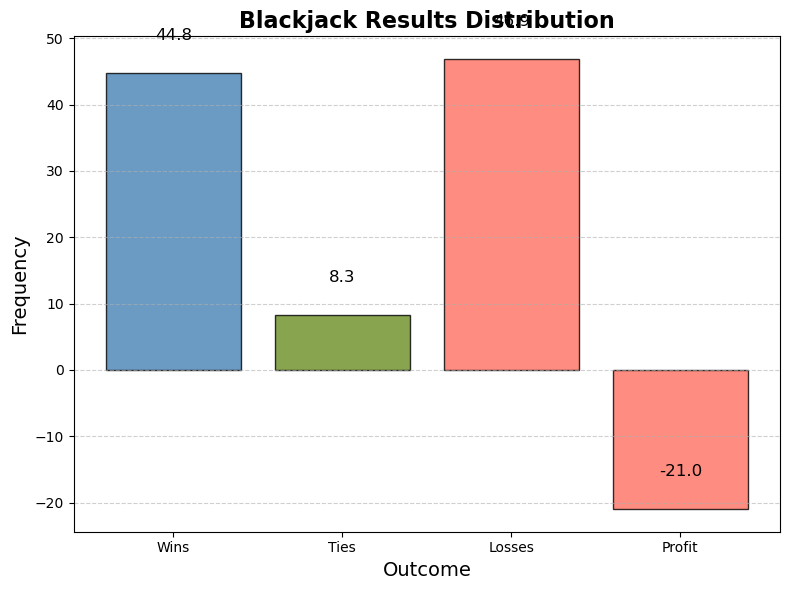

In [35]:
# Map results to categories
categories = ['Wins', 'Ties', 'Losses', 'Profit']
wins = 0
ties = 0 
losses = 0
profit = 0
avg_wins = 0
total_games = 0
for i in result: 
    wins += i[0]
    avg_wins += i[0]
    ties += i[1]
    losses += i[2]
    profit += i[3]
    total_games += i[0] + i[1] + i[2]

# Calculate percentages
win_percentage = (wins / total_games) * 100
tie_percentage = (ties / total_games) * 100
loss_percentage = (losses / total_games) * 100

# Display results
print(f"Total Games: {total_games}")
print(f"Win Percentage: {win_percentage:.2f}%")
print(f"Tie Percentage: {tie_percentage:.2f}%")
print(f"Loss Percentage: {loss_percentage:.2f}%")
print(f"Total Profit: {profit}")

results = [wins / 10, ties / 10, losses /10, profit / 10]
print(avg_wins / 10)
# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(categories, results, color=['#4682B4', '#6B8E23', '#FF6F61', '#FF6F61'], alpha=0.8, edgecolor='black')

# Add labels and title
plt.title('Blackjack Results Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add value annotations on the bars
for i, count in enumerate(results):
    plt.text(i, count + 5, str(count), ha='center', fontsize=12, color='black')

# Show the plot
plt.tight_layout()
plt.show()

average losses in 1000 games way to big, for asuuming that model actually plays well, -151 in 1000 games its not, good at all. In case to increase money profit we can teach model to split and double bets

## Adding a split and double possibilities as well as Soft Hands

<b>Split</b> - its when can the player splitting cards for 2 differents hands. And playing like with 2 diffrent hands. in this case player can earn 2 times more money, if both hands win. 
<b>Double</b> - you can double your bet, if you win you get 2 times more money, if lose you should give away 2 times more money.

In this case, if model will learn how to correctly use this moves, it can deacrese amount of money that it losses

In [39]:
# Define the "decide_split" logic
def decide_split(dealer_card, plycard1, plycard2):
    # Split logic: Only split pairs, especially Aces and 8s
    if plycard1 == plycard2:  # Only consider pairs for splitting
        if plycard1 == 11:  # Aces
            return 1  # Always split Aces
        elif plycard1 == 8:  # 8s
            return 1  # Always split 8s
        elif plycard1 in [2, 3]:  # 2s and 3s
            if 3 <= dealer_card <= 7:  # Split if dealer's card is 3-7
                return 1
        elif plycard1 == 6:  # 6s
            if 3 <= dealer_card <= 6:  # Split if dealer's card is 3-6
                return 1
        elif plycard1 == 7:  # 7s
            if dealer_card <= 7:  # Split if dealer's card is 2-7
                return 1
        elif plycard1 == 9:  # 9s
            if dealer_card in [2, 3, 4, 5, 6, 8, 9]:  # Split if dealer's card is 2-6 or 8-9
                return 1
    return 0  # Do not split

# Add a "soft_hand" column to indicate if the hand is soft
def is_soft_hand(card1, card2):
    return 1 if 11 in [card1, card2] else 0

# Add the "soft_hand" column to the main DataFrame
data['soft_hand'] = data.apply(lambda row: is_soft_hand(row['card1'], row['card2']), axis=1)

# Apply "decide_split" logic to data
data['split'] = data.apply(lambda row: decide_split(
    row['dealcard1'], row['card1'], row['card2']), axis=1)

# Verify the first 100 rows
data.head(100)


,Unnamed: 0,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,dealcard4,dealcard5,sumofdeal,blkjck,winloss,ply2cardsum,dl_Beat,dl_Bust,dl_Dlwin,dl_PlBust,dl_Push,ply_Beat,ply_Bust,ply_DlBust,ply_Plwin,ply_Push,take_card,soft_hand,split
0,0,7,10,0,0,0,17,10,8,0,0,0,18,0,0.0,17,False,False,True,False,False,True,False,False,False,False,0,0,0
1,1,10,9,0,0,0,19,10,8,0,0,0,18,0,1.0,19,True,False,False,False,False,False,False,False,True,False,0,0,0
2,2,9,8,0,0,0,17,10,8,0,0,0,18,0,0.0,17,False,False,True,False,False,True,False,False,False,False,0,0,0
3,3,2,10,0,5,0,17,10,8,0,0,0,18,0,0.0,12,False,False,True,False,False,True,False,False,False,False,1,0,0
4,4,10,2,0,5,0,17,10,8,0,0,0,18,0,0.0,12,False,False,True,False,False,True,False,False,False,False,1,0,0
5,5,6,1,8,10,0,25,10,8,0,0,0,18,0,0.0,7,False,False,False,True,False,False,True,False,False,False,1,0,0
6,0,10,4,0,0,0,14,4,4,5,10,0,23,0,1.0,14,False,True,False,False,False,False,False,True,False,False,0,0,0
7,1,3,10,0,0,0,13,4,4,5,10,0,23,0,1.0,13,False,True,False,False,False,False,False,True,False,False,0,0,0
8,2,10,2,0,0,0,12,4,4,5,10,0,23,0,1.0,12,False,True,False,False,False,False,False,True,False,False,0,0,0
9,3,9,6,0,0,0,15,4,4,5,10,0,23,0,1.0,15,False,True,False,False,False,False,False,True,False,False,0,0,0


In [40]:
def decide_take_card_improved(ply2cardsum, dealer_card, soft_hand):
    if soft_hand:  # Handle soft hands differently
        # Soft totals logic
        if ply2cardsum in [13, 14]:
            if dealer_card in [5, 6]:  # Double down opportunity
                return 2  # Double down
            return 1  # Hit otherwise
        elif ply2cardsum in [15, 16]:
            if dealer_card in [4, 5, 6]:  # Double down opportunity
                return 2  # Double down
            return 1  # Hit otherwise
        elif ply2cardsum == 17:
            if dealer_card in [3, 4, 5, 6]:  # Double down opportunity
                return 2  # Double down
            return 1  # Hit otherwise
        elif ply2cardsum == 18:  # A,7
            if dealer_card in [2, 3, 4, 5, 6, 7, 8]:  # Double down
                return 2
            return 1
        elif ply2cardsum == 19:  # A,7
            if dealer_card == 6:  # Double down
                return 2
            return 0
        else:  # A,8 or higher
            return 0  # Always stand
    else:  # Hard totals logic
        if ply2cardsum >= 17:
            return 0  # Always Stand
        elif 13 <= ply2cardsum <= 16:
            return 0 if 2 <= dealer_card <= 6 else 1  # Stand for dealer 2-6, else Hit
        elif ply2cardsum == 12:
            return 0 if 4 <= dealer_card <= 6 else 1  # Stand for dealer 4-6, else Hit
        elif ply2cardsum == 11:
            return 2  # Always Double Down
        elif ply2cardsum == 10:
            return 2 if dealer_card < 10 else 1  # Double Down for dealer < 10, else Hit
        elif ply2cardsum == 9:
            return 2 if 3 <= dealer_card <= 6 else 1  # Double Down for dealer 3-6, else Hit
        else:
            return 1  # Always Hit for totals of 8 or less

In [41]:
# Update the `take_card` column using the decide_take_card function
data['take_card'] = data.apply(
    lambda row: decide_take_card_improved(
        row['ply2cardsum'], 
        row['dealcard1'], 
        row['soft_hand']
    ), 
    axis=1
)

# Display the first 100 rows to verify
data.head(100)

,Unnamed: 0,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,dealcard4,dealcard5,sumofdeal,blkjck,winloss,ply2cardsum,dl_Beat,dl_Bust,dl_Dlwin,dl_PlBust,dl_Push,ply_Beat,ply_Bust,ply_DlBust,ply_Plwin,ply_Push,take_card,soft_hand,split
0,0,7,10,0,0,0,17,10,8,0,0,0,18,0,0.0,17,False,False,True,False,False,True,False,False,False,False,0,0,0
1,1,10,9,0,0,0,19,10,8,0,0,0,18,0,1.0,19,True,False,False,False,False,False,False,False,True,False,0,0,0
2,2,9,8,0,0,0,17,10,8,0,0,0,18,0,0.0,17,False,False,True,False,False,True,False,False,False,False,0,0,0
3,3,2,10,0,5,0,17,10,8,0,0,0,18,0,0.0,12,False,False,True,False,False,True,False,False,False,False,1,0,0
4,4,10,2,0,5,0,17,10,8,0,0,0,18,0,0.0,12,False,False,True,False,False,True,False,False,False,False,1,0,0
5,5,6,1,8,10,0,25,10,8,0,0,0,18,0,0.0,7,False,False,False,True,False,False,True,False,False,False,1,0,0
6,0,10,4,0,0,0,14,4,4,5,10,0,23,0,1.0,14,False,True,False,False,False,False,False,True,False,False,0,0,0
7,1,3,10,0,0,0,13,4,4,5,10,0,23,0,1.0,13,False,True,False,False,False,False,False,True,False,False,0,0,0
8,2,10,2,0,0,0,12,4,4,5,10,0,23,0,1.0,12,False,True,False,False,False,False,False,True,False,False,0,0,0
9,3,9,6,0,0,0,15,4,4,5,10,0,23,0,1.0,15,False,True,False,False,False,False,False,True,False,False,0,0,0


In [42]:
# Restrict data to relevant features for 'split'
X_spl = data[['card1', 'card2','dealcard1']]
y_spl = data['split']

# Split into training and testing sets for 'split'
X_train_spl, X_test_spl, y_train_spl, y_test_spl = train_test_split(X_spl, y_spl, test_size=0.2, random_state=42)

# Train the Random Forest model for 'split'
clf_split = RandomForestClassifier(random_state=42)
clf_split.fit(X_train_spl, y_train_spl)

# Evaluate the model accuracy for 'split'
accuracy_spl = clf_split.score(X_test_spl, y_test_spl)
print(f"Model accuracy for 'split' after feature restriction: {accuracy_spl:.2f}")

Model accuracy for 'split' after feature restriction: 1.00


In [43]:
X_tc = data[['card1', 'card2', 'ply2cardsum', 'dealcard1', 'soft_hand']]
y_tc = data['take_card']

# Split into training and testing sets for 'take_card'
X_train_tc, X_test_tc, y_train_tc, y_test_tc = train_test_split(X_tc, y_tc, test_size=0.2, random_state=42)

# Train the Random Forest model for 'take_card'
clf_take_card = RandomForestClassifier(random_state=42)
clf_take_card.fit(X_train_tc, y_train_tc)

# Evaluate the model accuracy for 'take_card'
accuracy_tc = clf_take_card.score(X_test_tc, y_test_tc)
print(f"Model accuracy for 'take_card' after feature restriction: {accuracy_tc:.2f}")


Model accuracy for 'take_card' after feature restriction: 1.00


In [44]:
def predict_action(ply2cardsum, card1, card2, dealer_card, clf, feature_names):
    """
    Predict the action (take card, double, or split) based on player's hand sum and dealer's visible card.

    Args:
    - ply2cardsum (int): Sum of the player's first two cards.
    - card1 (int): The first card of the player.
    - card2 (int): The second card of the player.
    - dealer_card (int): The dealer's visible card.
    - clf (RandomForestClassifier): The trained Random Forest model.
    - feature_names (list): List of feature names used during training.

    Returns:
    - int: Predicted action (0, 1, or 2).
    """
    # Determine if the hand is soft
    soft_hand = 1 if 11 in [card1, card2] else 0

    # Create a DataFrame for input with default values for all features
    input_data = pd.DataFrame(columns=feature_names)
    input_data.loc[0] = 0  # Initialize all features to 0

    # Set the relevant features
    input_data['ply2cardsum'] = ply2cardsum
    input_data['dealcard1'] = dealer_card
    input_data['card1'] = card1
    input_data['card2'] = card2

    # Add the 'soft_hand' feature if it exists in the model's training data
    if 'soft_hand' in feature_names:
        input_data['soft_hand'] = soft_hand

    # Ensure all features are present in the correct order
    input_data = input_data[feature_names]

    # Predict the action
    prediction = clf.predict(input_data)[0]
    return prediction


In [45]:
def generate_card_pairs(target_sum):
    """
    Generate all valid pairs of two cards that sum up to a given target, 
    with an indicator if the hand is soft.

    Args:
    - target_sum (int): The desired sum of two cards.

    Returns:
    - List of tuples, where each tuple is (card1, card2, soft_hand).
    """
    card_pairs = []
    for card1 in range(2, 12):  # Cards range from 2 to 11 (Ace as 11)
        card2 = target_sum - card1
        if 2 <= card2 <= 11:  # Ensure card2 is also a valid card
            # Determine if the hand is soft
            soft_hand = 1 if 11 in [card1, card2] else 0
            card_pairs.append((card1, card2, soft_hand))
    return card_pairs

In [46]:
def loop_through_possibilities_and_compare(
    clf_take_card, clf_double, clf_split, 
    feature_names_take_card, feature_names_double, feature_names_split
):
    """
    Loops through all possible combinations of player's two-card sum and dealer's visible card
    and outputs the model's decision to take a card, double, or split.

    Args:
    - clf_take_card (RandomForestClassifier): The trained Random Forest model for "take card."
    - clf_double (RandomForestClassifier): The trained Random Forest model for "double."
    - clf_split (RandomForestClassifier): The trained Random Forest model for "split."
    - feature_names_take_card (list): List of feature names used for "take card."
    - feature_names_double (list): List of feature names used for "double."
    - feature_names_split (list): List of feature names used for "split."

    Output:
    - Prints the result for each combination in a readable format.
    """
    # Print the header
    print(f"{'Player Sum':<12}{'Dealer Card':<12}{'Card Pair':<20}{'Soft Hand':<12}{'Take Card':<20}{'Double':<20}{'Split':<20}")

    for ply2cardsum in range(4, 22):  # Loop through player's sums from 4 to 21
        for dealer_card in range(2, 12):  # Dealer's upcard (2 to 11, Ace as 11)
            card_pairs = generate_card_pairs(ply2cardsum)
            for card1, card2, soft_hand in card_pairs:  # Unpack the soft_hand value as well
                # Predict actions
                action_take_card = predict_action(ply2cardsum, card1, card2, dealer_card, clf_take_card, feature_names_take_card)
                action_double = predict_action(ply2cardsum, card1, card2, dealer_card, clf_double, feature_names_double)
                action_split = predict_action(ply2cardsum, card1, card2, dealer_card, clf_split, feature_names_split)

                # Convert predictions to readable actions
                suggestion_take_card = "Take a card" if action_take_card == 1 else "Do NOT take a card"
                suggestion_double = "Double" if action_double == 1 else "Do NOT double"
                suggestion_split = "Split" if action_split == 1 else "Do NOT split"

                # Print the result in a formatted way
                print(f"{ply2cardsum:<12}{dealer_card:<12}{str((card1, card2)):<20}{soft_hand:<12}{suggestion_take_card:<20}{suggestion_double:<20}{suggestion_split:<20}")


In [47]:
import pandas as pd

# Collect results in a list
results = []

# Loop through all possibilities
for player_sum in range(4, 22):  # Loop through player sums from 4 to 21
    for dealer_card in range(2, 12):  # Loop through dealer cards from 2 to 11
        # Generate all possible card pairs for the given player sum
        card_pairs = generate_card_pairs(player_sum)
        
        for card1, card2, soft_hand in card_pairs:  # Include soft_hand from generate_card_pairs
            # Logic-based expected actions
            logic_take_card = decide_take_card_improved(player_sum, dealer_card, soft_hand)
            logic_split = decide_split(dealer_card, card1, card2)
            
            # Determine the logic for doubling
            logic_double = 1 if logic_take_card == 2 else 0

            # Model's predicted actions
            model_take_card_action = predict_action(player_sum, card1, card2, dealer_card, clf_take_card, X_train_tc.columns)
            model_split_action = predict_action(player_sum, card1, card2, dealer_card, clf_split, X_train_spl.columns)

            # Determine the model's double action based on its "Take a card" prediction
            model_double_action = 1 if model_take_card_action == 2 else 0

            # Append the results to the list
            results.append({
                'Card1': card1,
                'Card2': card2,
                'Player Sum': player_sum,
                'Dealer Card': dealer_card,
                'Logic Take Card': "Double" if logic_take_card == 2 else ("Take a card" if logic_take_card == 1 else "Do NOT take a card"),
                'Model Take Card': "Double" if model_take_card_action == 2 else ("Take a card" if model_take_card_action == 1 else "Do NOT take a card"),
                'Logic Double': "Double" if logic_double == 1 else "Do NOT double",
                'Model Double': "Double" if model_double_action == 1 else "Do NOT double",
                'Logic Split': "Split" if logic_split == 1 else "Do NOT split",
                'Model Split': "Split" if model_split_action == 1 else "Do NOT split",
            })

# Convert the results to a pandas DataFrame
results_df = pd.DataFrame(results)

# Adjust pandas display options for wider tables
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', 1000)        # Set the width to avoid truncation
pd.set_option('display.colheader_justify', 'left')  # Left-align column headers

# Display the entire DataFrame
print(results_df)


     Card1  Card2  Player Sum  Dealer Card Logic Take Card     Model Take Card     Logic Double   Model Double   Logic Split   Model Split  
0     2      2      4           2                  Take a card         Take a card  Do NOT double  Do NOT double  Do NOT split  Do NOT split
1     2      2      4           3                  Take a card         Take a card  Do NOT double  Do NOT double         Split         Split
2     2      2      4           4                  Take a card         Take a card  Do NOT double  Do NOT double         Split         Split
3     2      2      4           5                  Take a card         Take a card  Do NOT double  Do NOT double         Split         Split
4     2      2      4           6                  Take a card         Take a card  Do NOT double  Do NOT double         Split         Split
5     2      2      4           7                  Take a card         Take a card  Do NOT double  Do NOT double         Split         Split
6     2      

In [48]:
def loop_through_soft_hands_and_compare(clf_take_card, feature_names_take_card):
    """
    Loops through all possible combinations of soft hands and dealer's visible card,
    comparing both logic and model predictions.

    Args:
    - clf_take_card (RandomForestClassifier): The trained Random Forest model for "take card."
    - feature_names_take_card (list): List of feature names used for "take card."

    Output:
    - Prints the result for soft hands in a readable format.
    """
    # Print the header
    print(f"{'Card1':<8}{'Card2':<8}{'Soft Hand':<12}{'Player Sum':<12}{'Dealer Card':<12}"
          f"{'Logic Take Card':<20}{'Model Take Card':<20}{'Logic Double':<15}{'Model Double':<15}")

    for ply2cardsum in range(13, 22):  # Loop through player sums for soft hands (min soft is 13 with Ace)
        for dealer_card in range(2, 12):  # Dealer's upcard (2 to 11, Ace as 11)
            card_pairs = generate_card_pairs(ply2cardsum)
            for card1, card2, soft_hand in card_pairs:
                if soft_hand:  # Only consider soft hands
                    # Logic-based decision
                    logic_take_card = decide_take_card_improved(ply2cardsum, dealer_card, soft_hand)

                    # Determine the logic for doubling
                    logic_double = "Double" if logic_take_card == 2 else "Do NOT double"

                    # Model's predicted decision
                    model_take_card_action = predict_action(ply2cardsum, card1, card2, dealer_card, clf_take_card, feature_names_take_card)

                    # Determine the model's double action based on its "Take a card" prediction
                    model_double_action = "Double" if model_take_card_action == 2 else "Do NOT double"

                    # Convert decisions to readable suggestions
                    logic_take_card_suggestion = "Double" if logic_take_card == 2 else (
                        "Take a card" if logic_take_card == 1 else "Do NOT take a card")
                    model_take_card_suggestion = "Double" if model_take_card_action == 2 else (
                        "Take a card" if model_take_card_action == 1 else "Do NOT take a card")

                    # Print the result
                    print(f"{card1:<8}{card2:<8}{soft_hand:<12}{ply2cardsum:<12}{dealer_card:<12}"
                          f"{logic_take_card_suggestion:<20}{model_take_card_suggestion:<20}"
                          f"{logic_double:<15}{model_double_action:<15}")

# Feature names for the 'take_card' model
feature_names_take_card = X_train_tc.columns

# Loop through soft hands and display the comparison
loop_through_soft_hands_and_compare(clf_take_card, feature_names_take_card)


Card1   Card2   Soft Hand   Player Sum  Dealer Card Logic Take Card     Model Take Card     Logic Double   Model Double   
2       11      1           13          2           Take a card         Take a card         Do NOT double  Do NOT double  
11      2       1           13          2           Take a card         Take a card         Do NOT double  Do NOT double  
2       11      1           13          3           Take a card         Take a card         Do NOT double  Do NOT double  
11      2       1           13          3           Take a card         Take a card         Do NOT double  Do NOT double  
2       11      1           13          4           Take a card         Take a card         Do NOT double  Do NOT double  
11      2       1           13          4           Take a card         Take a card         Do NOT double  Do NOT double  
2       11      1           13          5           Double              Double              Double         Double         
11      2       

# Testing model with new abilities

In [50]:
def simulate_100_games_extended():
    # Results tracking
    results = []
    games = 100  # Number of games to simulate

    # Initial balance and bet setup
    initial_balance = 1000  # Starting balance
    balance = initial_balance
    bet_amount = 10  # Fixed bet amount per game

    # Create the initial shoe
    shoe = create_shoe()
    original_shoe_size = len(shoe)
    cards_used = 0  # Track cards used

    # Counters for splits and doubles
    split_counter = 0
    double_counter = 0

    while games > 0:
        # Reshuffle if there are not enough cards left
        if reshuffle_needed(cards_used, original_shoe_size):
            shoe = create_shoe()
            original_shoe_size = len(shoe)
            cards_used = 0

        # Deal cards to the player and dealer
        player = player_card(shoe)
        dealer = dealer_get_card(shoe)
        cards_used += 4  # 2 for the player, 2 for the dealer
        current_bet = bet_amount  # Initialize the current bet for this game
        split_hands = []  # Track split hands (if any)
        game_outcomes = []  # Track outcomes for each hand

        # Handle split decision
        if player[0] == player[1]:  # Both cards are the same
            model_split_action = predict_action(sum(player), player[0], player[1], dealer[0], clf_split, X_train_spl.columns)
            if model_split_action == 1:  # Player decides to split
                split_counter += 1
                split_hands.append([player[0], shoe.pop(0)])
                split_hands.append([player[1], shoe.pop(0)])
                cards_used += 2

        # If no split, add the initial hand as is
        if not split_hands:
            split_hands.append(player)

        # Process each hand (including split hands)
        for hand in split_hands:
            # Player's turn
            while True:
                take_card_decision = predict_action(sum(hand), hand[0], hand[1], dealer[0], clf_take_card, X_train_tc.columns)

                if take_card_decision == 2 and len(hand) == 2:  # Double down on first two cards
                    double_counter += 1
                    hand.append(shoe.pop(0))
                    cards_used += 1
                    current_bet *= 2
                    break

                if take_card_decision == 1:  # Player decides to take a card
                    hand.append(shoe.pop(0))
                    cards_used += 1
                    if sum(hand) > 21:  # Check for bust and handle a soft hand
                        if 11 in hand:
                            hand[hand.index(11)] = 1  # Convert Ace from 11 to 1
                        else:
                            break
                else:
                    break

            # Dealer's turn
            while sum(dealer) <= 16:
                dealer.append(shoe.pop(0))
                cards_used += 1
                if sum(dealer) > 21:  # Check for bust and handle a soft hand
                    if 11 in dealer:
                        dealer[dealer.index(11)] = 1  # Convert Ace from 11 to 1
                    else:
                        break

            # Determine the game outcome and update the balance
            if sum(hand) > 21:  # Player busts
                game_outcomes.append(0)
                balance -= current_bet  # Loss
            elif sum(dealer) > 21:  # Dealer busts
                game_outcomes.append(1)
                balance += current_bet  # Win
            elif sum(hand) > sum(dealer):  # Player wins
                game_outcomes.append(1)
                balance += current_bet  # Win
            elif sum(hand) == sum(dealer):  # Tie
                game_outcomes.append(0.5)
                # No change to the balance
            else:  # Dealer wins
                game_outcomes.append(0)
                balance -= current_bet  # Loss

        results.extend(game_outcomes)
        games -= 1

    # Summary statistics
    wins = results.count(1)
    ties = results.count(0.5)
    losses = results.count(0)
    print("wins:", wins)
    print("ties:", ties)
    print("losses:", losses)
    print("split counter:", split_counter)
    print("double counter:", double_counter)
    print("total games:", len(results))
    print("initial balance:", initial_balance)
    print("final balance:", balance)
    print("profit/loss:", balance - initial_balance)
    return [wins, ties, losses, balance - initial_balance]

# Simulate 100 games
simulation_results = simulate_100_games_extended()
print("Simulation Results:", simulation_results)


wins: 36
ties: 7
losses: 59
split counter: 2
double counter: 19
total games: 102
initial balance: 1000
final balance: 760
profit/loss: -240
Simulation Results: [36, 7, 59, -240]


In [51]:
result = []
for _ in range(100):
    game = simulate_100_games_extended()
    result.append(game)

wins: 29
ties: 8
losses: 66
split counter: 3
double counter: 17
total games: 103
initial balance: 1000
final balance: 550
profit/loss: -450
wins: 36
ties: 4
losses: 61
split counter: 1
double counter: 16
total games: 101
initial balance: 1000
final balance: 690
profit/loss: -310
wins: 40
ties: 4
losses: 57
split counter: 1
double counter: 15
total games: 101
initial balance: 1000
final balance: 830
profit/loss: -170
wins: 41
ties: 7
losses: 53
split counter: 1
double counter: 16
total games: 101
initial balance: 1000
final balance: 940
profit/loss: -60
wins: 32
ties: 5
losses: 65
split counter: 2
double counter: 16
total games: 102
initial balance: 1000
final balance: 700
profit/loss: -300
wins: 28
ties: 6
losses: 67
split counter: 1
double counter: 8
total games: 101
initial balance: 1000
final balance: 580
profit/loss: -420
wins: 30
ties: 4
losses: 66
split counter: 0
double counter: 10
total games: 100
initial balance: 1000
final balance: 620
profit/loss: -380
wins: 37
ties: 12
loss

Total Games: 10148
Win Percentage: 34.58%
Tie Percentage: 6.06%
Loss Percentage: 59.36%
Total Profit: -24220
350.9


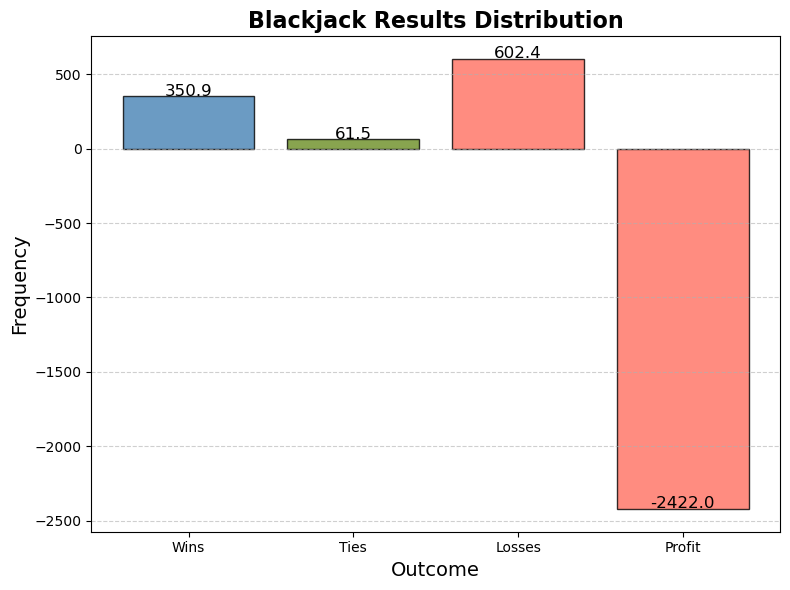

In [52]:
# Map results to categories
categories = ['Wins', 'Ties', 'Losses', 'Profit']
wins = 0
ties = 0 
losses = 0
profit = 0
avg_wins = 0
total_games = 0

for i in result: 
    wins += i[0]
    avg_wins += i[0]
    ties += i[1]
    losses += i[2]
    profit += i[3]
    total_games += i[0] + i[1] + i[2]

# Calculate percentages
win_percentage = (wins / total_games) * 100
tie_percentage = (ties / total_games) * 100
loss_percentage = (losses / total_games) * 100

# Display results
print(f"Total Games: {total_games}")
print(f"Win Percentage: {win_percentage:.2f}%")
print(f"Tie Percentage: {tie_percentage:.2f}%")
print(f"Loss Percentage: {loss_percentage:.2f}%")
print(f"Total Profit: {profit}")

results = [wins / 10, ties / 10, losses /10, profit / 10]
print(avg_wins / 10)
# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(categories, results, color=['#4682B4', '#6B8E23', '#FF6F61', '#FF6F61'], alpha=0.8, edgecolor='black')

# Add labels and title
plt.title('Blackjack Results Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add value annotations on the bars
for i, count in enumerate(results):
    plt.text(i, count + 5, str(count), ha='center', fontsize=12, color='black')

# Show the plot
plt.tight_layout()
plt.show()

Averagly, amount of money that models wins is appoximately 3 times bigger than it was without split and double possibilities. This is already not so bad but it would be better if profit will be closer to 0

## Looking for bust probability

After we taught a computer to make a desicions about taking or not cards, now we will teach computer to predict if next move will lead to bust (sum of cards more than 21) and if yes with what probability

## Ideas for future development:
### 1. Model optimization
### 2. Regularization ???
### 3. Card counting
### 4. Calculate percentages for cards
### 5. ?????????????????


# TODO 
1. Soft hand
2. Text, comments, explonations
3. Probability counting
4. Poster
5. Double, Split etc.
6. Counting cards
[]